In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_excel("data\customer_churn_large_dataset.xlsx")
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [4]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

Data has no null values

In [5]:
df.duplicated().sum()

0

There is no Duplicates

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [7]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


age feature has minimum 18 and maximum 70 year of age
Suscription_Length_Months has minimum value 1 month and maximum 12 month

In [8]:
numeric_column=['Age','Subscription_Length_Months',	'Monthly_Bill',	'Total_Usage_GB']
categorical_colum=['Gender','Location']

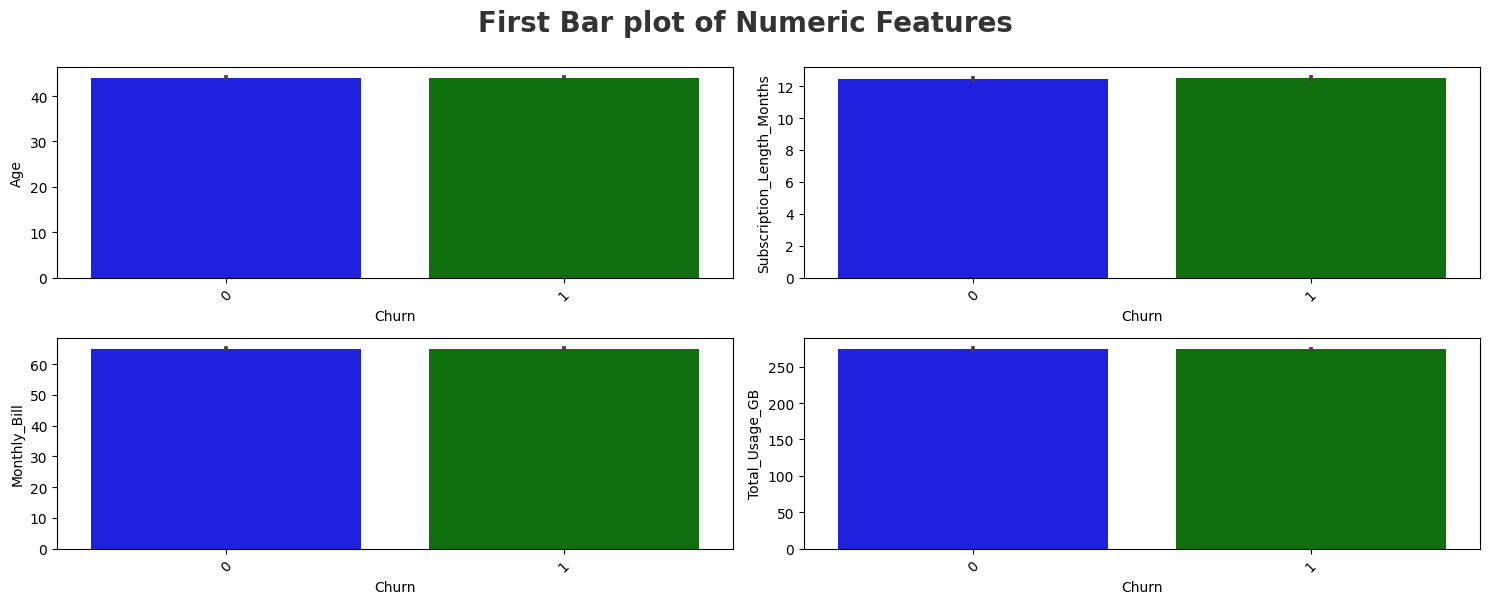

In [9]:
# plot for numerical columns
plt.figure(figsize=(15, 6))
plt.suptitle('First Bar plot of Numeric Features', fontsize=20, fontweight='bold', alpha=0.8,y=1)
for i in range(0, len(numeric_column)):
    plt.subplot(2, 2, i+1)
    sns.barplot(data=df, y=df[numeric_column[i]], x='Churn', palette=['b', 'g'])
    plt.xlabel("Churn")
    plt.xticks(rotation=45)
    plt.tight_layout()

These features are not showing any relation with target feature (Churn)

<Axes: xlabel='Location', ylabel='Churn'>

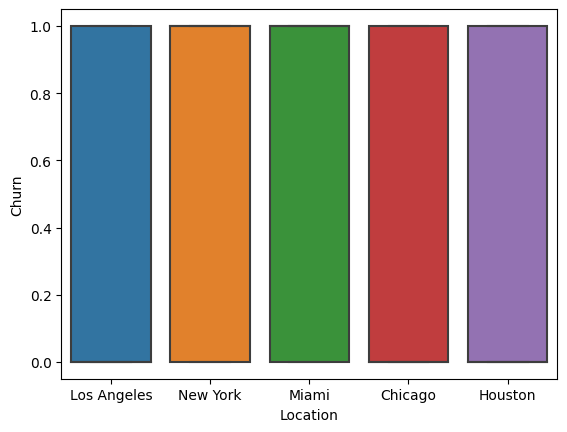

In [10]:
sns.boxplot(data=df, y="Churn",x='Location')

<Axes: xlabel='Gender', ylabel='Churn'>

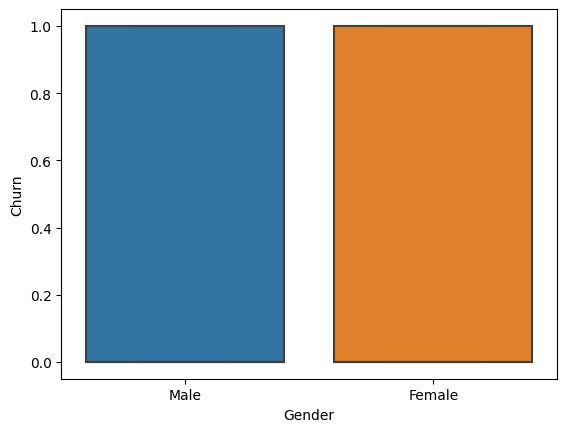

In [11]:
sns.boxplot(data=df, y="Churn",x='Gender')#, hue="Location")

These two categorical features are also not showing any effect on target feature (Churn)

In [12]:
df=df.drop(labels=['Name','CustomerID'],axis=1)

Name and CustomerID both features are not affecting target column, So i droped these two features

In [13]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


<Axes: >

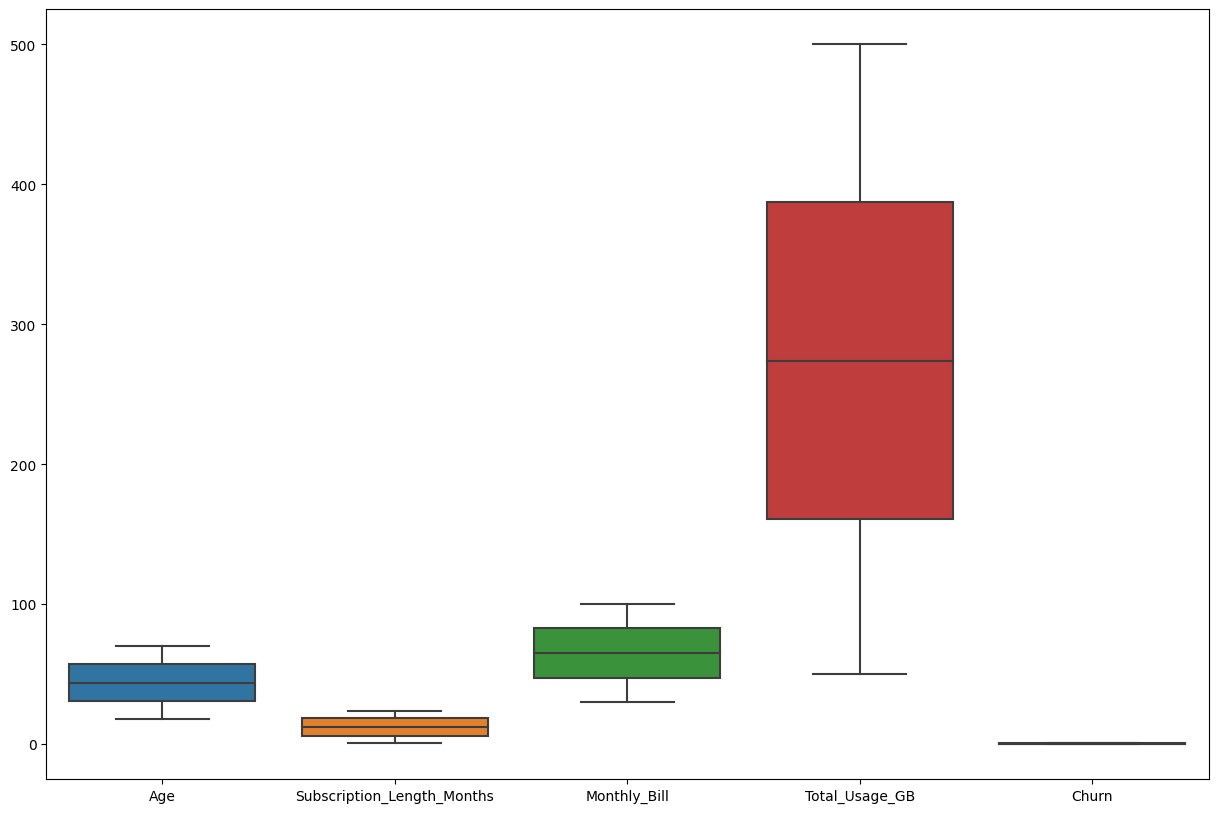

In [14]:
plt.figure(figsize=(15,10))
sns.boxplot(df)

There is no outlier.

<Axes: >

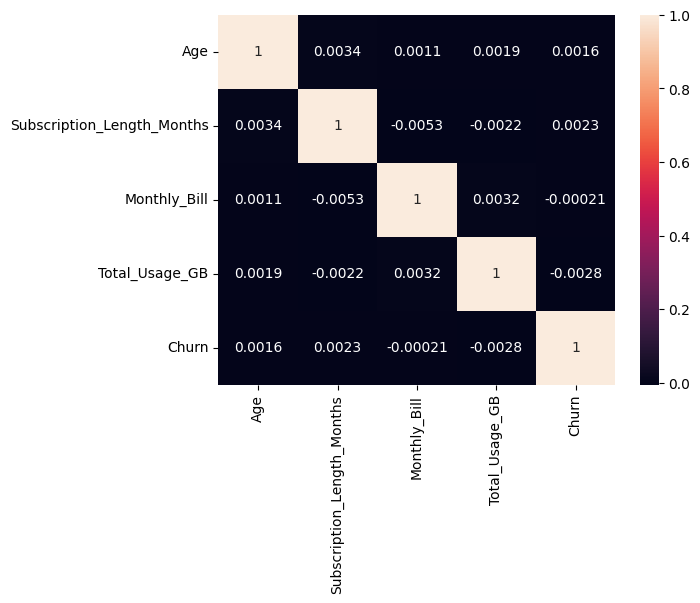

In [15]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

There is very poor correlation between target feature and other features

In [16]:
X=df.drop(labels=['Churn'],axis=1)
Y=df[['Churn']]

In [17]:
# Define which columns should be ordinal-encoded and which should be scale
categorical_cols=X.select_dtypes(exclude="number").columns
numerical_cols=X.select_dtypes(include='number').columns

print("categorical columns: ", categorical_cols)
print("numerical columns: ",numerical_cols)

categorical columns:  Index(['Gender', 'Location'], dtype='object')
numerical columns:  Index(['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB'], dtype='object')


In [18]:
Gender=['Male', 'Female']
Location=['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston']

In [19]:
from sklearn import preprocessing

In [20]:
from sklearn.preprocessing import StandardScaler  # Handling feature  scaling
from sklearn.preprocessing import OneHotEncoder # onehot encodind

## Pipelines 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [21]:
num_pipeline=Pipeline(
                steps=[
                    ('scaler',StandardScaler())

                ]

            )

# Categorigal Pipeline
cat_pipeline=Pipeline(
                steps=[
                    ('onehot',OneHotEncoder(sparse=False,handle_unknown="ignore",drop="first")),
                    ('scaler',StandardScaler())
                ]

            )
##Get Preprocessor object
preprocessor=ColumnTransformer([
                    ('num_pipeline',num_pipeline,numerical_cols),
                    ('cat_pipeline',cat_pipeline,categorical_cols)
            ])

In [ ]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.40,random_state=123)
# Apply Preprocessor object to transform data 
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,recall_score,f1_score

In [25]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    a_score = accuracy_score(y_test,y_pred)
    return mae, rmse, a_score

In [55]:
## Train multiple models

models = {
          "Random Forest":RandomForestClassifier(),
          "Decision Tree":DecisionTreeClassifier(),
          "Logistic":LogisticRegression(),
        }    
trained_model_list=[]
model_list=[]
accuracy_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, a_score=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("accuracy_score: ",a_score*100)

    accuracy_list.append(a_score)
    
    print('='*35)
    print('\n')

d:\ineuron\dvc\.conda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest
Model Training Performance
RMSE: 0.7083431371870557
MAE: 0.50175
accuracy_score:  49.825


Decision Tree
Model Training Performance
RMSE: 0.7049822692805827
MAE: 0.497
accuracy_score:  50.3


Logistic
Model Training Performance
RMSE: 0.701908113644514
MAE: 0.492675
accuracy_score:  50.7325




d:\ineuron\dvc\.conda\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


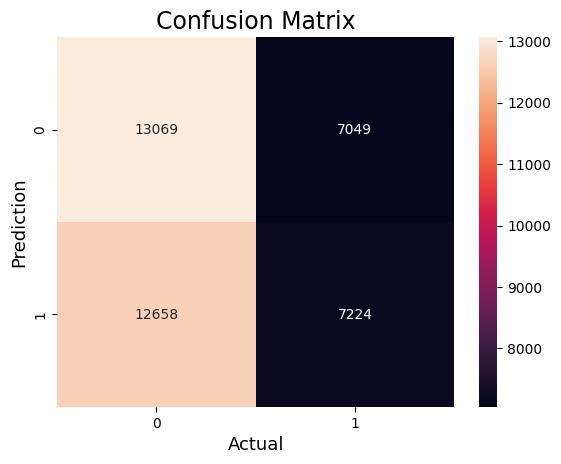

In [56]:
cm = confusion_matrix(y_test,y_pred)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',)
           
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [57]:
# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred) * 100
print("Test Accuracy Score  :", accuracy)
precision = precision_score(y_test, y_pred) * 100
print("Precision Score :", precision)
recall = recall_score(y_test, y_pred) * 100
print("Recall Score    :", recall)
F1_score = f1_score(y_test, y_pred) * 100
print("F1-score Score  :", F1_score)

Test Accuracy Score  : 50.7325
Precision Score : 50.61304561059343
Recall Score    : 36.33437279951715
F1-score Score  : 42.30127360562144


In [41]:
#train accuracy
x_pred=model.predict(X_train)
train_accuracy=accuracy_score(y_train,model.predict(X_train)) * 100
print("Train Accuracy Score  :",train_accuracy)

Train Accuracy Score  : 50.453333333333326


Train Accuracy Score and Test Accuracy Score both are approximately similar

I got Accuracy 50 because there is correlation between target and other features.

In [44]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(21,activation="sigmoid",input_dim=9))#input layer
model.add(Dense(21,activation="sigmoid"))#hidden layer
model.add(Dense(1,activation="sigmoid"))#output layer
print("Model Summary", model.summary())

model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])
model.fit(X_train,y_train,batch_size=0,epochs=11,verbose=1)
y_pred=model.predict(X_test)

y_pred=y_pred.argmax(axis=-1)
from sklearn.metrics import accuracy_score
print("Tensorflow Test Accuracy  ;", accuracy_score(y_test,y_pred)*100)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 21)                210       
                                                                 
 dense_1 (Dense)             (None, 21)                462       
                                                                 
 dense_2 (Dense)             (None, 1)                 22        
                                                                 
Total params: 694 (2.71 KB)
Trainable params: 694 (2.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model Summary None
Epoch 1/11
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6968 - accuracy: 0.4997
Epoch 2/11
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6937 - accuracy: 0.5006
Epoch 3/11
1875/1875 [==============================] - 2s 1ms/step

Tensorflow give accuracy 50.29 which approximately same

GridSearchCV take so much time to run so I drop it

In [ ]:
'''
from sklearn.model_selection import GridSearchCV
# Define the model
model_g = RandomForestClassifier(random_state=42)

# Define hyperparameters and their potential values for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV object with cross-validation
grid_search = GridSearchCV(model_g, param_grid, cv=5, scoring='accuracy')

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the testing data
y_pred = best_model.predict(X_test_scaled)

# Find the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)
print("Best Parameters:", grid_search.best_params_)'''

RandomizedSearchCV not improved accuracy score so i dropped it too

In [62]:
from sklearn.model_selection import  RandomizedSearchCV

# Define hyperparameters and their potential values for tuning
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

#Model

# Define the model
model_r = RandomForestClassifier(random_state=42)

# Create RandomizedSearchCV 

random_search = RandomizedSearchCV(model_r, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Fit the model with random search

random_search.fit(X_train, y_train)

# Get the best model from the random search
best_model = random_search.best_estimator_

# Make predictions on the testing data
y_pred = best_model.predict(X_test)

# Find the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)
print("Best Parameters:", random_search.best_params_)

d:\ineuron\dvc\.conda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\ineuron\dvc\.conda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\ineuron\dvc\.conda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\ineuron\dvc\.conda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Best Model Accuracy: 0.50055
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy'}


 I got 50.05% accuracy after applying RandomizedSearchCV on Random forest classifier model.